In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
identified_feaures_df = pd.read_pickle('/data/experiments/YHE/sequence-library/percolator-id-feature-mapping.pkl')

In [3]:
identified_feaures_df.columns

Index(['file_idx', 'scan', 'charge_x', 'spectrum precursor m/z',
       'spectrum neutral mass', 'peptide mass', 'percolator score',
       'percolator q-value', 'percolator PEP', 'total matches/spectrum',
       'sequence', 'protein id', 'flanking aa', 'feature_id', 'charge_y',
       'rt_apex', 'rt_peak_width', 'scan_apex', 'scan_peak_width', 'intensity',
       'precursor_id', 'monoisotopic_mass', 'predicted_mass_error',
       'recalibrated_monoisotopic_mass', 'recalibrated_monoisotopic_mz',
       'percolator_idx', 'human'],
      dtype='object')

In [73]:
identified_feaures_df.file_idx.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [4]:
len(identified_feaures_df[identified_feaures_df['peptide mass'] <= 0])

3498

In [5]:
# remove the rubbish peptide masses
identified_feaures_df = identified_feaures_df[identified_feaures_df['peptide mass'] > 0]

In [6]:
len(identified_feaures_df)

564292

In [58]:
identified_features_from_runs_l = []
for group_name,group_df in identified_feaures_df.groupby(['sequence','charge_x'], as_index=False):
    file_ids_l = group_df[['file_idx','percolator q-value']].to_dict('records')
    identified_features_from_runs_l.append((group_name[0], group_name[1], file_ids_l))

In [59]:
identified_features_from_runs_df = pd.DataFrame(identified_features_from_runs_l, columns=['sequence','charge','file_ids_identified'])

In [60]:
identified_features_from_runs_df.sample(n=10)

,sequence,charge,file_ids_identified
154,AAPGTTLAPGSSNTGATASLGGSAMTR,2,"[{'file_idx': 11, 'percolator q-value': 0.0010..."
3697,DGCENGETTQQIGLR,2,"[{'file_idx': 26, 'percolator q-value': 3.7296..."
21298,QEIFQEQLAAVPEFR,2,"[{'file_idx': 6, 'percolator q-value': 8.63960..."
13293,IIQQVLQGLDYLHTK,3,"[{'file_idx': 6, 'percolator q-value': 3.72963..."
21182,QAVNETPGSPM[15.9949]FVMK,2,"[{'file_idx': 7, 'percolator q-value': 0.00159..."
29275,VLATVTKPVGGDK,2,"[{'file_idx': 16, 'percolator q-value': 3.7296..."
5229,DVVPVDLVDFDHLITK,3,"[{'file_idx': 30, 'percolator q-value': 3.7296..."
19866,NEYGPVLHMPTSK,2,"[{'file_idx': 12, 'percolator q-value': 3.7296..."
26278,TDLINWLSGNTESSQYLK,2,"[{'file_idx': 30, 'percolator q-value': 0.0065..."
31786,YPGVSNYQVEEDIGK,2,"[{'file_idx': 6, 'percolator q-value': 0.00187..."


In [61]:
identified_features_from_runs_df.loc[28616].file_ids_identified

[{'file_idx': 29, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 16, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 21, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 23, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 0, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 27, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 23, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 0, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 21, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 15, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 25, 'percolator q-value': 3.7296314999999997e-06},
 {'file_idx': 22, 'percolator q-value': 8.6396074e-06},
 {'file_idx': 18, 'percolator q-value': 8.6396074e-06},
 {'file_idx': 10, 'percolator q-value': 8.6396074e-06},
 {'file_idx': 25, 'percolator q-value': 2.5195073e-05},
 {'file_idx': 16, 'percolator q-value': 2.7506601999999997e-05}

In [74]:
files_l = []
for row in identified_features_from_runs_df.itertuples():
    files_a = np.zeros(31)+10  # initialise with very high q_value
    for f in row.file_ids_identified:
        files_a[f['file_idx']] = f['percolator q-value']
    files_l.append(files_a)

In [77]:
columns = []
for file_idx in range(0,31):
    columns.append('file_{}'.format(file_idx))
files_df = pd.DataFrame(files_l, columns=columns)


In [78]:
files_df.sample(n=5)

,file_0,file_1,file_2,file_3,file_4,file_5,file_6,file_7,file_8,file_9,...,file_21,file_22,file_23,file_24,file_25,file_26,file_27,file_28,file_29,file_30
2075,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000009,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
19983,10.000000,10.000000,0.000004,10.000000,10.000000,10.000000,0.000004,0.000009,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000004,10.000000
30969,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,0.000745,10.000000,10.000000,10.000000,10.000000,10.000000
15501,0.000004,0.000004,0.000004,0.000004,0.000009,0.000016,0.000004,0.000009,0.000004,0.000004,...,0.000004,0.000004,0.000004,0.000004,0.000009,0.000004,0.000004,0.000004,0.000004,0.000004
1182,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000354,10.000000,...,10.000000,10.000000,10.000000,0.004872,10.000000,0.009995,10.000000,10.000000,10.000000,10.000000


In [79]:
identifications_with_files_df = pd.concat([identified_features_from_runs_df, files_df], axis=1)

In [80]:
identifications_with_files_df.columns

Index(['sequence', 'charge', 'file_ids_identified', 'file_0', 'file_1',
       'file_2', 'file_3', 'file_4', 'file_5', 'file_6', 'file_7', 'file_8',
       'file_9', 'file_10', 'file_11', 'file_12', 'file_13', 'file_14',
       'file_15', 'file_16', 'file_17', 'file_18', 'file_19', 'file_20',
       'file_21', 'file_22', 'file_23', 'file_24', 'file_25', 'file_26',
       'file_27', 'file_28', 'file_29', 'file_30'],
      dtype='object')

In [81]:
identifications_with_files_df.sample(n=10)

,sequence,charge,file_ids_identified,file_0,file_1,file_2,file_3,file_4,file_5,file_6,...,file_21,file_22,file_23,file_24,file_25,file_26,file_27,file_28,file_29,file_30
5256,DWRPAITIK,2,"[{'file_idx': 17, 'percolator q-value': 3.7296...",0.000034,0.000009,10.000000,0.000004,0.000007,10.000000,0.000205,...,10.000000,10.000000,0.000465,10.000000,10.000000,10.000000,10.000000,0.000548,0.001758,0.000077
20321,NLVATFICVFEK,2,"[{'file_idx': 26, 'percolator q-value': 0.0004...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,0.000401,10.000000,10.000000,10.000000,0.000909
29445,VLNNM[15.9949]EIGASLFDEEGAK,2,"[{'file_idx': 22, 'percolator q-value': 0.0029...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,0.002950,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
18562,MDTLAGIFGIGQHPK,2,"[{'file_idx': 25, 'percolator q-value': 3.7296...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,0.000004,10.000000,0.000004,10.000000,0.000004,10.000000,0.000004,10.000000
6925,ELYLLMEEEEINAQHSDNK,2,"[{'file_idx': 22, 'percolator q-value': 0.0072...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,0.007293,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
10257,GIPIEVIPMAYVPVSR,2,"[{'file_idx': 3, 'percolator q-value': 3.72963...",10.000000,10.000000,0.000004,0.000114,0.000009,0.000004,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
26241,TDEAFFDSENDPEK,2,"[{'file_idx': 4, 'percolator q-value': 3.72963...",10.000000,10.000000,10.000000,10.000000,0.000004,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
14326,IVILPDYLEIAR,2,"[{'file_idx': 8, 'percolator q-value': 3.72963...",0.000009,0.000004,0.000007,0.000009,0.000004,0.000016,0.000004,...,0.000004,0.000007,0.000016,0.000009,0.000009,0.000004,0.000009,0.000009,0.000009,0.000004
14590,KELDPDDSHLNLDETTK,3,"[{'file_idx': 25, 'percolator q-value': 0.0022...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,0.002202,10.000000,10.000000,10.000000,10.000000,10.000000
3044,CTQDLGNSTK,2,"[{'file_idx': 22, 'percolator q-value': 8.7497...",10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,0.000235,10.000000,0.001765,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [85]:
file_idx_run_name_mapping_df = pd.read_csv('/data/experiments/YHE/recalibrated-percolator-output/percolator-idx-mapping.csv')

In [97]:
file_idx_run_name_mapping_df['group'] = file_idx_run_name_mapping_df.run_name.apply(lambda x: x.split('_')[0])

In [98]:
file_idx_run_name_mapping_df

,file_idx,run_name,group
0,0,YHE114_01_Slot1-1_1_3008,YHE114
1,1,YHE010_05_Slot1-1_1_2990,YHE010
2,2,YHE010_02_Slot1-1_1_2987,YHE010
3,3,YHE010_03_Slot1-1_1_2988,YHE010
4,4,YHE010_09_Slot1-1_1_2994,YHE010
5,5,YHE010_07_Slot1-1_1_2992,YHE010
6,6,YHE010_11_Slot1-1_1_3041,YHE010
7,7,YHE010_10_Slot1-1_1_2995,YHE010
8,8,YHE211_10_Slot1-1_1_3006,YHE211
9,9,YHE211_09_Slot1-1_1_3005,YHE211


In [91]:
# how similar is file_0 and file_1?
abs(identifications_with_files_df.file_0 - identifications_with_files_df.file_1).sum()

88297.69063124422

In [92]:
# how similar is file_1 and file_2?
abs(identifications_with_files_df.file_1 - identifications_with_files_df.file_2).sum()

55159.47786022042

In [93]:
abs(identifications_with_files_df.file_1 - identifications_with_files_df.file_3).sum()

43930.38685242446

In [94]:
abs(identifications_with_files_df.file_3 - identifications_with_files_df.file_8).sum()

93216.52153043402

In [95]:
abs(identifications_with_files_df.file_3 - identifications_with_files_df.file_3).sum()

0.0

In [96]:
abs(identifications_with_files_df.file_0 - identifications_with_files_df.file_8).sum()

54389.68336653529

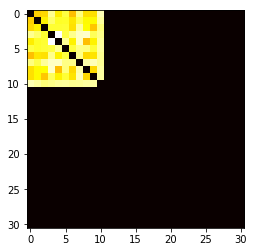

In [122]:
import matplotlib.pyplot as plt
import numpy as np

a = np.zeros((31,31), dtype='float')
i = 0
j = 0
for group_name,group_df in file_idx_run_name_mapping_df.groupby(['group'], as_index=False):
    group_i = group_df.copy()
    group_j = group_df.copy()
    for row_i in group_i.itertuples():
        for row_j in group_j.itertuples():
            a[i,j] = abs(identifications_with_files_df['file_{}'.format(row_i.file_idx)] - identifications_with_files_df['file_{}'.format(row_j.file_idx)]).sum()
            j += 1
        i += 1
        j = 0
    i = 0

plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()
